In [ ]:
# cd to "required_files" folder

In [2]:
import nibabel as nib
import nibabel.gifti
import nilearn
from nilearn import datasets, plotting
import sys
import pandas as pd
import numpy as np
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import pylab as plt
from matplotlib.colors import ListedColormap
mpl.rcParams['svg.fonttype'] = 'none'
import sys
sys.path.append('gradient_data/src/')
from scipy.optimize import curve_fit
import scipy as scipy
from pyearth import Earth
from matplotlib import pyplot
import numpy
import sklearn
import seaborn as sns

/om/user/xaviergp/env/xavier_env/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


/om/user/xaviergp/env/xavier_env/lib/python2.7/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Forward Pass
----------------------------------------------------------------
iter  parent  var  knot   mse       terms  gcv    rsq    grsq   
----------------------------------------------------------------
0     -       -    -      0.103980  1      0.104  0.000  0.000  
1     0       0    17694  0.103347  3      0.103  0.006  0.006  
----------------------------------------------------------------
Stopping Condition 0: Reached maximum number of terms

Pruning Pass
--------------------------------------------
iter  bf  terms  mse   gcv    rsq    grsq   
--------------------------------------------
0     -   3      0.10  0.103  0.006  0.006  
1     1   2      0.10  0.103  0.006  0.005  
2     2   1      0.10  0.104  0.000  0.000  
--------------------------------------------
Selected iteration: 0

Earth Model
-------------------------------------
Basis Function  Pruned  Coefficient  
-------------------------------------
(Intercept)     No      1.82629      
h(x0+3.62748)   No      0.0

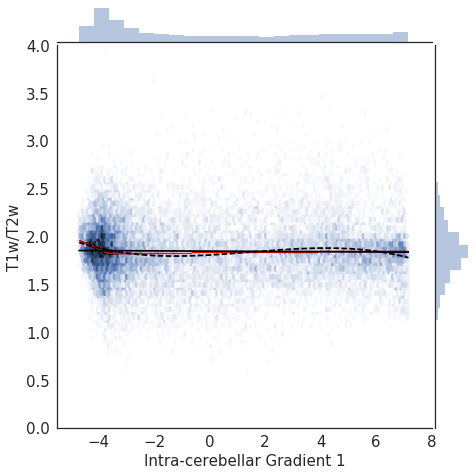

Linear equation:   
-0.001372 x + 1.847
Pearson r linear equation:  -0.016279 , r^2:  0.000265005
Pearson p linear equation:  0.0296220828109
Spearman r linear equation:  -0.0634771726991
Spearman p linear equation:  2.07567304223e-17
Cubic equation:
          3            2
-0.00103 x + 0.004568 x + 0.01627 x + 1.807
r^2 for cubic equation:  0.0111264389957
r^2 for spline:  0.00608801516098


In [4]:
#CEREBELLUM GRADIENT 1:

MYELIN_cerebellum = nib.load('myelin_cerebellumonly_100average.dscalar.nii').get_data()

res = nib.load('result_fromcerebellumtocerebellum.dscalar.nii').get_data()
res.shape = (8, 17853)
res_component1 = res[0]
res_component2 = res[1]
res_component3 = res[2]
res_component4 = res[3]


import seaborn as sns
sns.set(style="white")
sns.set_context("notebook", font_scale=1.5)

df = pd.DataFrame()
df['e0'] = np.array(res_component1)
df['e1'] = MYELIN_cerebellum[0]
df['e2'] = np.array(res_component2)
df['e3'] = np.array(res_component4)

gradient = df['e0']
myelin = df['e1']

fig = (sns.jointplot(gradient, myelin, kind='hex', size=7, ratio=10,
                   ylim = [0, 4],
                   xlim = [-5.5, 8], space=0.1, stat_func=None).set_axis_labels('Intra-cerebellar Gradient 1', 'T1w/T2w', fontsize=15))

x= gradient
xp = np.linspace(np.min(x), np.max(x), x.count()) 
y= myelin
z3 = np.polyfit(x, y, 3) 
p3 = np.poly1d(z3) 
z1 = np.polyfit(x, y, 1)
p1 = np.poly1d(z1)

Xearth = gradient
yearth = myelin
model = Earth(max_degree= None, max_terms=2)
model.fit(Xearth,yearth)
print(model.trace())
print(model.summary())
yearth_hat = model.predict(Xearth)

fig.ax_joint.plot(Xearth, yearth_hat, 'r.', xp, p3(xp), 'k--', xp, p1(xp), 'k-', markersize=2.1)
plt.show()
fig.savefig(os.path.abspath('./100_corr_crb1.png'), format='png', dpi=600, transparent=False)

pear_r = scipy.stats.pearsonr(myelin, gradient)
spear_r = scipy.stats.spearmanr(myelin, gradient)
print 'Linear equation: ', (np.poly1d(p1))
print 'Pearson r linear equation: ', pear_r[0], ', r^2: ', (pear_r[0]*pear_r[0])
print 'Pearson p linear equation: ', pear_r[1]
print 'Spearman r linear equation: ', spear_r[0]
print 'Spearman p linear equation: ', spear_r[1]
print 'Cubic equation:'
print (np.poly1d(p3))
print 'r^2 for cubic equation: ', sklearn.metrics.r2_score(y, p3(x))
print 'r^2 for spline: ', (model.score(Xearth, yearth))

Forward Pass
----------------------------------------------------------------
iter  parent  var  knot   mse       terms  gcv    rsq    grsq   
----------------------------------------------------------------
0     -       -    -      0.103980  1      0.104  0.000  0.000  
1     0       0    14887  0.103126  3      0.103  0.008  0.008  
----------------------------------------------------------------
Stopping Condition 0: Reached maximum number of terms

Pruning Pass
--------------------------------------------
iter  bf  terms  mse   gcv    rsq    grsq   
--------------------------------------------
0     -   3      0.10  0.103  0.008  0.008  
1     1   2      0.10  0.104  0.004  0.004  
2     2   1      0.10  0.104  0.000  0.000  
--------------------------------------------
Selected iteration: 0

Earth Model
-------------------------------------
Basis Function  Pruned  Coefficient  
-------------------------------------
(Intercept)     No      1.79936      
h(x0-1.39766)   No      0.2

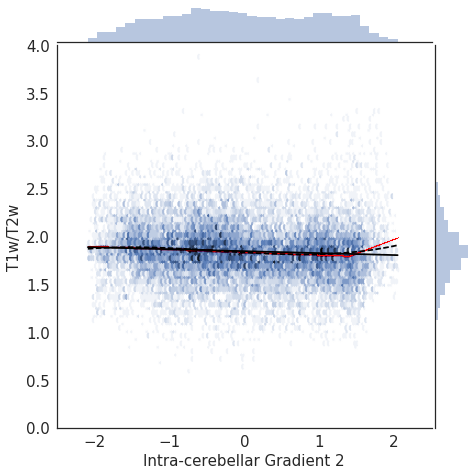

Linear equation:   
-0.02031 x + 1.847
Pearson r linear equation:  -0.0628278 , r^2:  0.00394734
Pearson p linear equation:  4.37213741029e-17
Spearman r linear equation:  -0.0869574334806
Spearman p linear equation:  2.57811553369e-31
Cubic equation:
         3           2
0.01259 x + 0.01395 x - 0.04434 x + 1.833
r^2 for cubic equation:  0.00668830092098
r^2 for spline:  0.00821083826152


In [5]:
#CEREBELLUM GRADIENT 2:

MYELIN_cerebellum = nib.load('myelin_cerebellumonly_100average.dscalar.nii').get_data()

res = nib.load('result_fromcerebellumtocerebellum.dscalar.nii').get_data()
res.shape = (8, 17853)
res_component1 = res[0]
res_component2 = res[1]
res_component3 = res[2]
res_component4 = res[3]

import seaborn as sns
sns.set(style="white")
sns.set_context("notebook", font_scale=1.5)

df = pd.DataFrame()
df['e0'] = np.array(res_component1)
df['e1'] = MYELIN_cerebellum[0]
df['e2'] = np.array(res_component2)
df['e3'] = np.array(res_component4)

gradient = df['e2']
myelin = df['e1']

fig = (sns.jointplot(gradient, myelin, kind='hex', size=7, ratio=10,
                   ylim = [0, 4],
                   xlim = [-2.5, 2.5], space=0.1, stat_func=None).set_axis_labels('Intra-cerebellar Gradient 2', 'T1w/T2w', fontsize=15))

x= gradient
xp = np.linspace(np.min(x), np.max(x), x.count()) 
y= myelin
z3 = np.polyfit(x, y, 3) 
p3 = np.poly1d(z3) 
z1 = np.polyfit(x, y, 1)
p1 = np.poly1d(z1)

Xearth = gradient
yearth = myelin
model = Earth(max_terms=2, max_degree=1)
model.fit(Xearth,yearth)
print(model.trace())
print(model.summary())
yearth_hat = model.predict(Xearth)

fig.ax_joint.plot(Xearth, yearth_hat, 'r.', xp, p3(xp), 'k--', xp, p1(xp), 'k-', markersize=2.1)

plt.show()
fig.savefig(os.path.abspath('./100_corr_crb2.png'), format='png', dpi=600, transparent=False)

pear_r = scipy.stats.pearsonr(myelin, gradient)
spear_r = scipy.stats.spearmanr(myelin, gradient)
print 'Linear equation: ', (np.poly1d(p1))
print 'Pearson r linear equation: ', pear_r[0], ', r^2: ', (pear_r[0]*pear_r[0])
print 'Pearson p linear equation: ', pear_r[1]
print 'Spearman r linear equation: ', spear_r[0]
print 'Spearman p linear equation: ', spear_r[1]
print 'Cubic equation:'
print (np.poly1d(p3))
print 'r^2 for cubic equation: ', sklearn.metrics.r2_score(y, p3(x))
print 'r^2 for spline: ', (model.score(Xearth, yearth))

Forward Pass
----------------------------------------------------------------
iter  parent  var  knot   mse       terms  gcv    rsq    grsq   
----------------------------------------------------------------
0     -       -    -      0.103980  1      0.104  0.000  0.000  
1     0       0    13918  0.103062  3      0.103  0.009  0.008  
----------------------------------------------------------------
Stopping Condition 0: Reached maximum number of terms

Pruning Pass
--------------------------------------------
iter  bf  terms  mse   gcv    rsq    grsq   
--------------------------------------------
0     -   3      0.10  0.103  0.009  0.008  
1     1   2      0.10  0.103  0.006  0.005  
2     2   1      0.10  0.104  0.000  0.000  
--------------------------------------------
Selected iteration: 0

Earth Model
--------------------------------------
Basis Function   Pruned  Coefficient  
--------------------------------------
(Intercept)      No      1.80439      
h(x0+0.291866)   No    

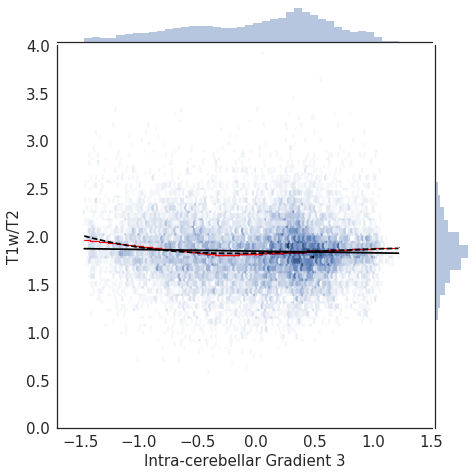

Linear equation:   
-0.01773 x + 1.847
Pearson r linear equation:  -0.0328661 , r^2:  0.00108018
Pearson p linear equation:  1.12164958944e-05
Spearman r linear equation:  -0.0329815820014
Spearman p linear equation:  1.04460376515e-05
Cubic equation:
          3           2
-0.03001 x + 0.05374 x + 0.02084 x + 1.825
r^2 for cubic equation:  0.00768034604677
r^2 for spline:  0.00882433038864


In [5]:
#CEREBELLUM GRADIENT 3:

MYELIN_cerebellum = nib.load('myelin_cerebellumonly_100average.dscalar.nii').get_data()

res = nib.load('result_fromcerebellumtocerebellum.dscalar.nii').get_data()
res.shape = (8, 17853)
res_component1 = res[0]
res_component2 = res[1]
res_component3 = res[2] * (-1) # multiply by -1 so that it matches the direction of Guell et al., 2018
res_component4 = res[3]

import seaborn as sns
sns.set(style="white")
sns.set_context("notebook", font_scale=1.5)

df = pd.DataFrame()
df['e0'] = np.array(res_component1)
df['e1'] = MYELIN_cerebellum[0]
df['e2'] = np.array(res_component2)
df['e3'] = np.array(res_component3)

gradient = df['e3']
myelin = df['e1']

fig = (sns.jointplot(gradient, myelin, kind='hex', size=7, ratio=10,
                   ylim = [0, 4],
                   xlim = [-1.7, 1.5], space=0.1, stat_func=None).set_axis_labels('Intra-cerebellar Gradient 3', 'T1w/T2', fontsize=15))

x= gradient
xp = np.linspace(np.min(x), np.max(x), x.count()) 
y= myelin
z3 = np.polyfit(x, y, 3) 
p3 = np.poly1d(z3) 
z1 = np.polyfit(x, y, 1)
p1 = np.poly1d(z1)

Xearth = gradient
yearth = myelin
model = Earth(max_terms=2, max_degree=1)
model.fit(Xearth,yearth)
print(model.trace())
print(model.summary())
yearth_hat = model.predict(Xearth)

fig.ax_joint.plot(Xearth, yearth_hat, 'r.', xp, p3(xp), 'k--', xp, p1(xp), 'k-', markersize=2.1)
fig.savefig(os.path.abspath('./100_corr_crb3.png'), format='png', dpi=600, transparent=False)
plt.show()

pear_r = scipy.stats.pearsonr(myelin, gradient)
spear_r = scipy.stats.spearmanr(myelin, gradient)
print 'Linear equation: ', (np.poly1d(p1))
print 'Pearson r linear equation: ', pear_r[0], ', r^2: ', (pear_r[0]*pear_r[0])
print 'Pearson p linear equation: ', pear_r[1]
print 'Spearman r linear equation: ', spear_r[0]
print 'Spearman p linear equation: ', spear_r[1]
print 'Cubic equation:'
print (np.poly1d(p3))
print 'r^2 for cubic equation: ', sklearn.metrics.r2_score(y, p3(x))
print 'r^2 for spline: ', (model.score(Xearth, yearth))

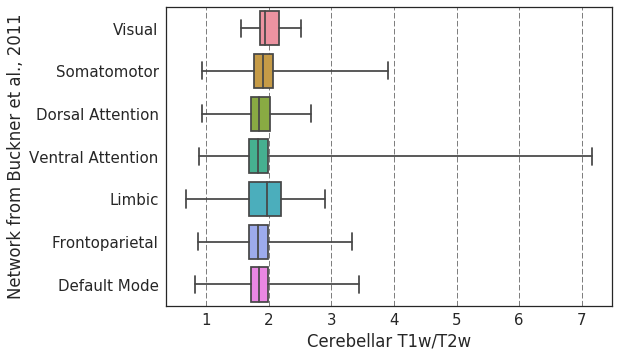

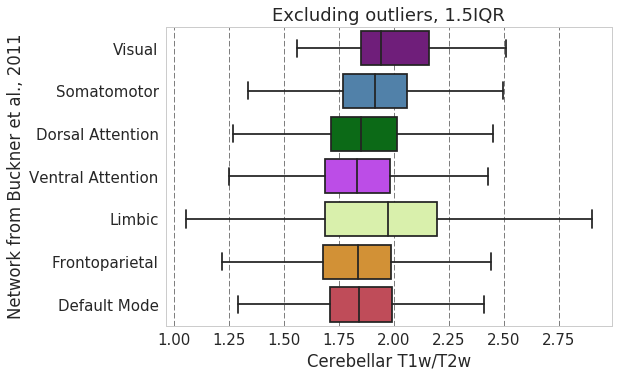

In [8]:
#GENERATE BOXPLOTS AS DONE IN THE PREVIOUS GROUP AVERAGE ANALYSIS; CEREBELLUM:

buckner = nib.load('buckner7networks.dscalar.nii').get_data()
buckner = buckner[0]
MYELIN_cerebellum = nib.load('myelin_cerebellumonly_100average.dscalar.nii').get_data()
MYELIN_cerebellum = MYELIN_cerebellum[0]

MYELIN_cerebellum_visual = MYELIN_cerebellum[buckner == 1]
MYELIN_cerebellum_somatomotor = MYELIN_cerebellum[buckner == 2]
MYELIN_cerebellum_DAN = MYELIN_cerebellum[buckner == 3]
MYELIN_cerebellum_VAN = MYELIN_cerebellum[buckner == 4]
MYELIN_cerebellum_limbic = MYELIN_cerebellum[buckner == 5]
MYELIN_cerebellum_FP = MYELIN_cerebellum[buckner == 6]
MYELIN_cerebellum_DMN = MYELIN_cerebellum[buckner == 7]

datatoplot = [MYELIN_cerebellum_visual, MYELIN_cerebellum_somatomotor, MYELIN_cerebellum_DAN, MYELIN_cerebellum_VAN, MYELIN_cerebellum_limbic, MYELIN_cerebellum_FP, MYELIN_cerebellum_DMN]
cols7 = ((120,  18, 134),
         (70 ,130, 180),
         ( 0 ,118 , 14),
         (196 , 58 ,250),
         (220 ,248 ,164),
         (230, 148,  34),
         (205 , 62,  78 ))
cols = cols7
cols = np.asarray(cols, dtype=float)/255
labels=['Visual', 'Somatomotor', 'Dorsal Attention', 'Ventral Attention', 'Limbic', 'Frontoparietal', 'Default Mode']

ax = sns.boxplot(data=datatoplot, whis=999999999, orient='h', saturation=0.8)
sns.set_palette(cols)
sns.set_style('whitegrid')
ax.set_ylabel('Network from Buckner et al., 2011')
ax.set_xlabel('Cerebellar T1w/T2w')
ax.set_yticklabels(labels)
ax.grid(color='k', linestyle='--', linewidth=0.5, axis='x')
plt.show()

ax = sns.boxplot(data=datatoplot, whis=1.5, orient='h', saturation=0.8, showfliers=False)
sns.set_palette(cols)
sns.set_style('whitegrid')
ax.set_ylabel('Network from Buckner et al., 2011')
ax.set_xlabel('Cerebellar T1w/T2w')
ax.set_title('Excluding outliers, 1.5IQR')
ax.set_yticklabels(labels)
ax.grid(color='k', linestyle='--', linewidth=0.5, axis='x')
plt.show()
ax.figure.savefig(os.path.abspath('./100_networks_crb.png'), format='png', dpi=600, bbox_inches='tight', transparent=False)


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


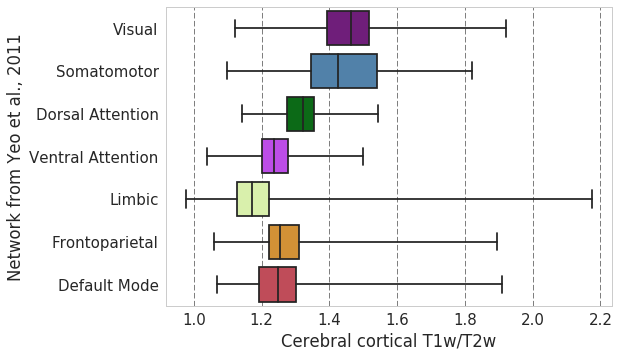

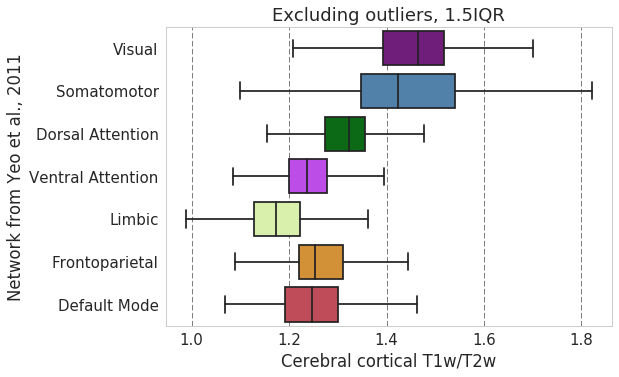

In [15]:
#GENERATE BOXPLOTS AS DONE IN THE PREVIOUS GROUP AVERAGE ANALYSIS; CEREBRAL CORTEX:

DMNatlas = nib.load('DMN_minusmedialwall.dscalar.nii').get_data()
DMNatlas=DMNatlas[0]
dorsalattatlas = nib.load('dorsalatt_minusmedialwall.dscalar.nii').get_data()
dorsalattatlas=dorsalattatlas[0]
ventralattatlas = nib.load('ventralatt_minusmedialwall.dscalar.nii').get_data()
ventralattatlas=ventralattatlas[0]
frontoparietalatlas = nib.load('frontoparietal_minusmedialwall.dscalar.nii').get_data()
frontoparietalatlas=frontoparietalatlas[0]
limbicatlas = nib.load('limbic_minusmedialwall.dscalar.nii').get_data()
limbicatlas=limbicatlas[0]
visualatlas = nib.load('visual_minusmedialwall.dscalar.nii').get_data()
visualatlas=visualatlas[0]
somatomotoratlas = nib.load('somatomotor_minusmedialwall.dscalar.nii').get_data()
somatomotoratlas=somatomotoratlas[0]

MYELIN_cerebralcortex = nib.load('S1200.MyelinMap_BC_MSMAll.32k_fs_LR.dscalar.nii').get_data()
MYELIN_cerebralcortex = MYELIN_cerebralcortex[0]

gradient_cerebralcortex = nib.load('result_bilateralcortex.dscalar.nii').get_data()
gradient_cerebralcortex.shape = (8, 59412)
gradient1 = gradient_cerebralcortex[0]

testing = MYELIN_cerebralcortex

myelin_visual = testing[visualatlas == 1]
myelin_somatomotor = testing[somatomotoratlas == 1]
myelin_DAN = testing[dorsalattatlas == 1]
myelin_VAN = testing[ventralattatlas == 1]
myelin_limbic = testing[limbicatlas == 1]
myelin_FP = testing[frontoparietalatlas == 1]
myelin_DMN = testing[DMNatlas == 1]

datatoplot = [myelin_visual, myelin_somatomotor, myelin_DAN, myelin_VAN, myelin_limbic, myelin_FP, myelin_DMN]
cols7 = ((120,  18, 134),
         (70 ,130, 180),
         ( 0 ,118 , 14),
         (196 , 58 ,250),
         (220 ,248 ,164),
         (230, 148,  34),
         (205 , 62,  78 ))
cols = cols7
cols = np.asarray(cols, dtype=float)/255
labels=['Visual', 'Somatomotor', 'Dorsal Attention', 'Ventral Attention', 'Limbic', 'Frontoparietal', 'Default Mode']

ax = sns.boxplot(data=datatoplot, whis=999999999, orient='h', saturation=0.8)
sns.set_palette(cols)
sns.set_style('whitegrid')
ax.set_ylabel('Network from Yeo et al., 2011')
ax.set_xlabel('Cerebral cortical T1w/T2w')
ax.set_yticklabels(labels)
ax.grid(color='k', linestyle='--', linewidth=0.5, axis='x')
plt.show()

ax = sns.boxplot(data=datatoplot, whis=1.5, orient='h', saturation=0.8, showfliers=False)
sns.set_palette(cols)
sns.set_style('whitegrid')
ax.set_ylabel('Network from Yeo et al., 2011')
ax.set_xlabel('Cerebral cortical T1w/T2w')
ax.set_title('Excluding outliers, 1.5IQR')
ax.set_yticklabels(labels)
ax.grid(color='k', linestyle='--', linewidth=0.5, axis='x')
plt.show()